In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [4]:
df=pd.read_csv('D:/farrell/LES DATA SCIENCE/Final Project/Dataset/archive/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
df.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Naive_Bayes_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Naive_Bayes_mon_2'}, inplace = True)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
'''Nunique Columns'''

def nunique_counts(df):
   for i in df.columns:
       count = df[i].nunique()
       print(i, ": ", count)
nunique_counts(df)

CLIENTNUM :  10127
Attrition_Flag :  2
Customer_Age :  45
Gender :  2
Dependent_count :  6
Education_Level :  7
Marital_Status :  4
Income_Category :  6
Card_Category :  4
Months_on_book :  44
Total_Relationship_Count :  6
Months_Inactive_12_mon :  7
Contacts_Count_12_mon :  7
Credit_Limit :  6205
Total_Revolving_Bal :  1974
Avg_Open_To_Buy :  6813
Total_Amt_Chng_Q4_Q1 :  1158
Total_Trans_Amt :  5033
Total_Trans_Ct :  126
Total_Ct_Chng_Q4_Q1 :  830
Avg_Utilization_Ratio :  964
Naive_Bayes_mon_1 :  1704
Naive_Bayes_mon_2 :  640


In [7]:
'''Unique Columns'''

def unique_counts(data):
    features = df.dtypes[df.dtypes == "object"].index.values.tolist()
    for i in features:
        count = data[i].unique()
        print(i, ": ", count, len(count))
        
unique_counts(df)

Attrition_Flag :  ['Existing Customer' 'Attrited Customer'] 2
Gender :  ['M' 'F'] 2
Education_Level :  ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate'] 7
Marital_Status :  ['Married' 'Single' 'Unknown' 'Divorced'] 4
Income_Category :  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown'] 6
Card_Category :  ['Blue' 'Gold' 'Silver' 'Platinum'] 4


In [8]:
'''Label Encoding With Label'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['CLIENTNUM'])

l = [i for i in range(10127)]
dict(zip(list(le.classes_), l))

df['CLIENTNUM'] = le.transform(df['CLIENTNUM'])

In [9]:
df['CLIENTNUM'].unique()

array([7152, 9812, 3053, ..., 4406, 4840, 3261], dtype=int64)

In [10]:
'''Checking Duplicate'''

print('Dupplicate entries: {}'.format(df.duplicated().sum()))

Dupplicate entries: 0


0


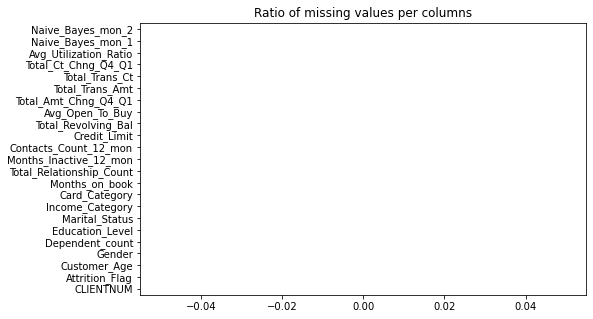

In [11]:
'''Missing Value Chart'''
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
print(df.isnull().values.sum()) #total missing values

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'Naive_Bayes_mon_1'}>],
       [<AxesSubplot:title={'center':'N

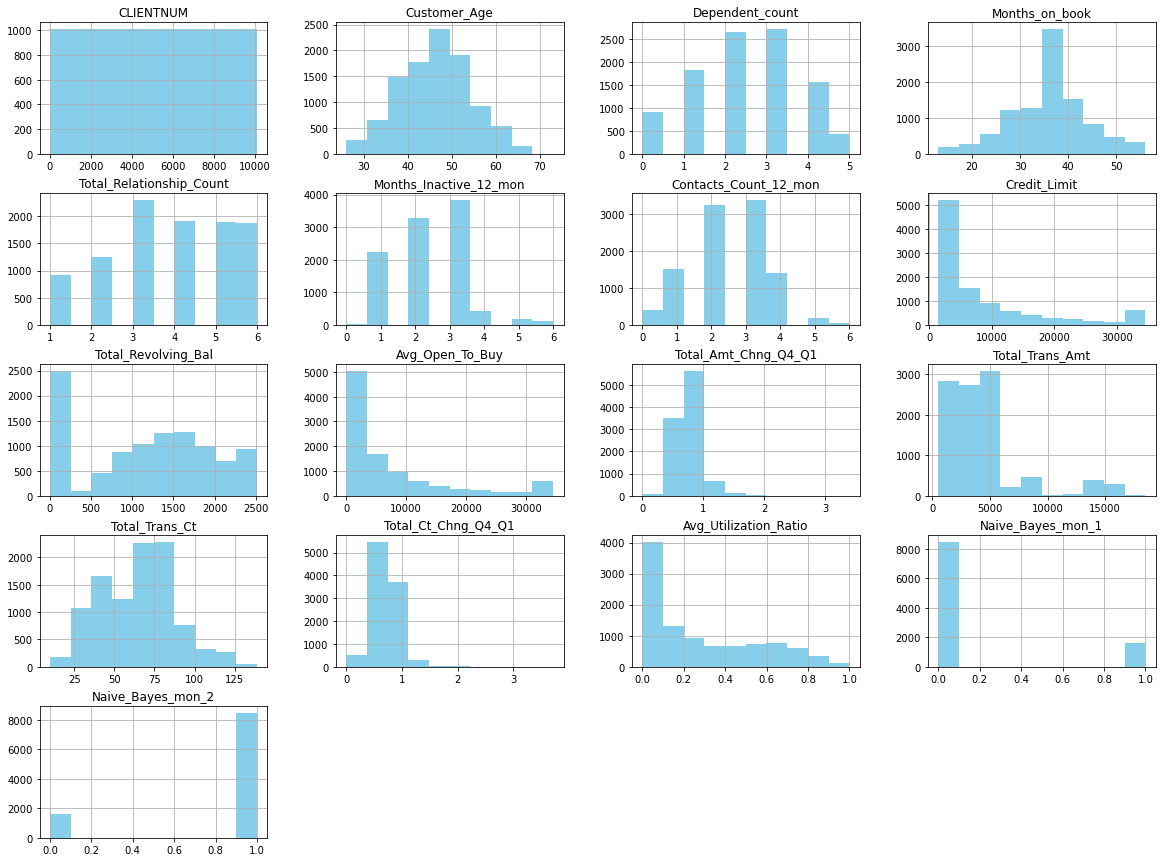

In [12]:
df.hist(figsize=(20,15),color="skyblue")

In [13]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
count,10127.000000,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5063.000000,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,2923.557422,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,0.000000,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,2531.500000,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,5063.000000,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7594.500000,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900


ValueError: num must be 1 <= num <= 14, not 15

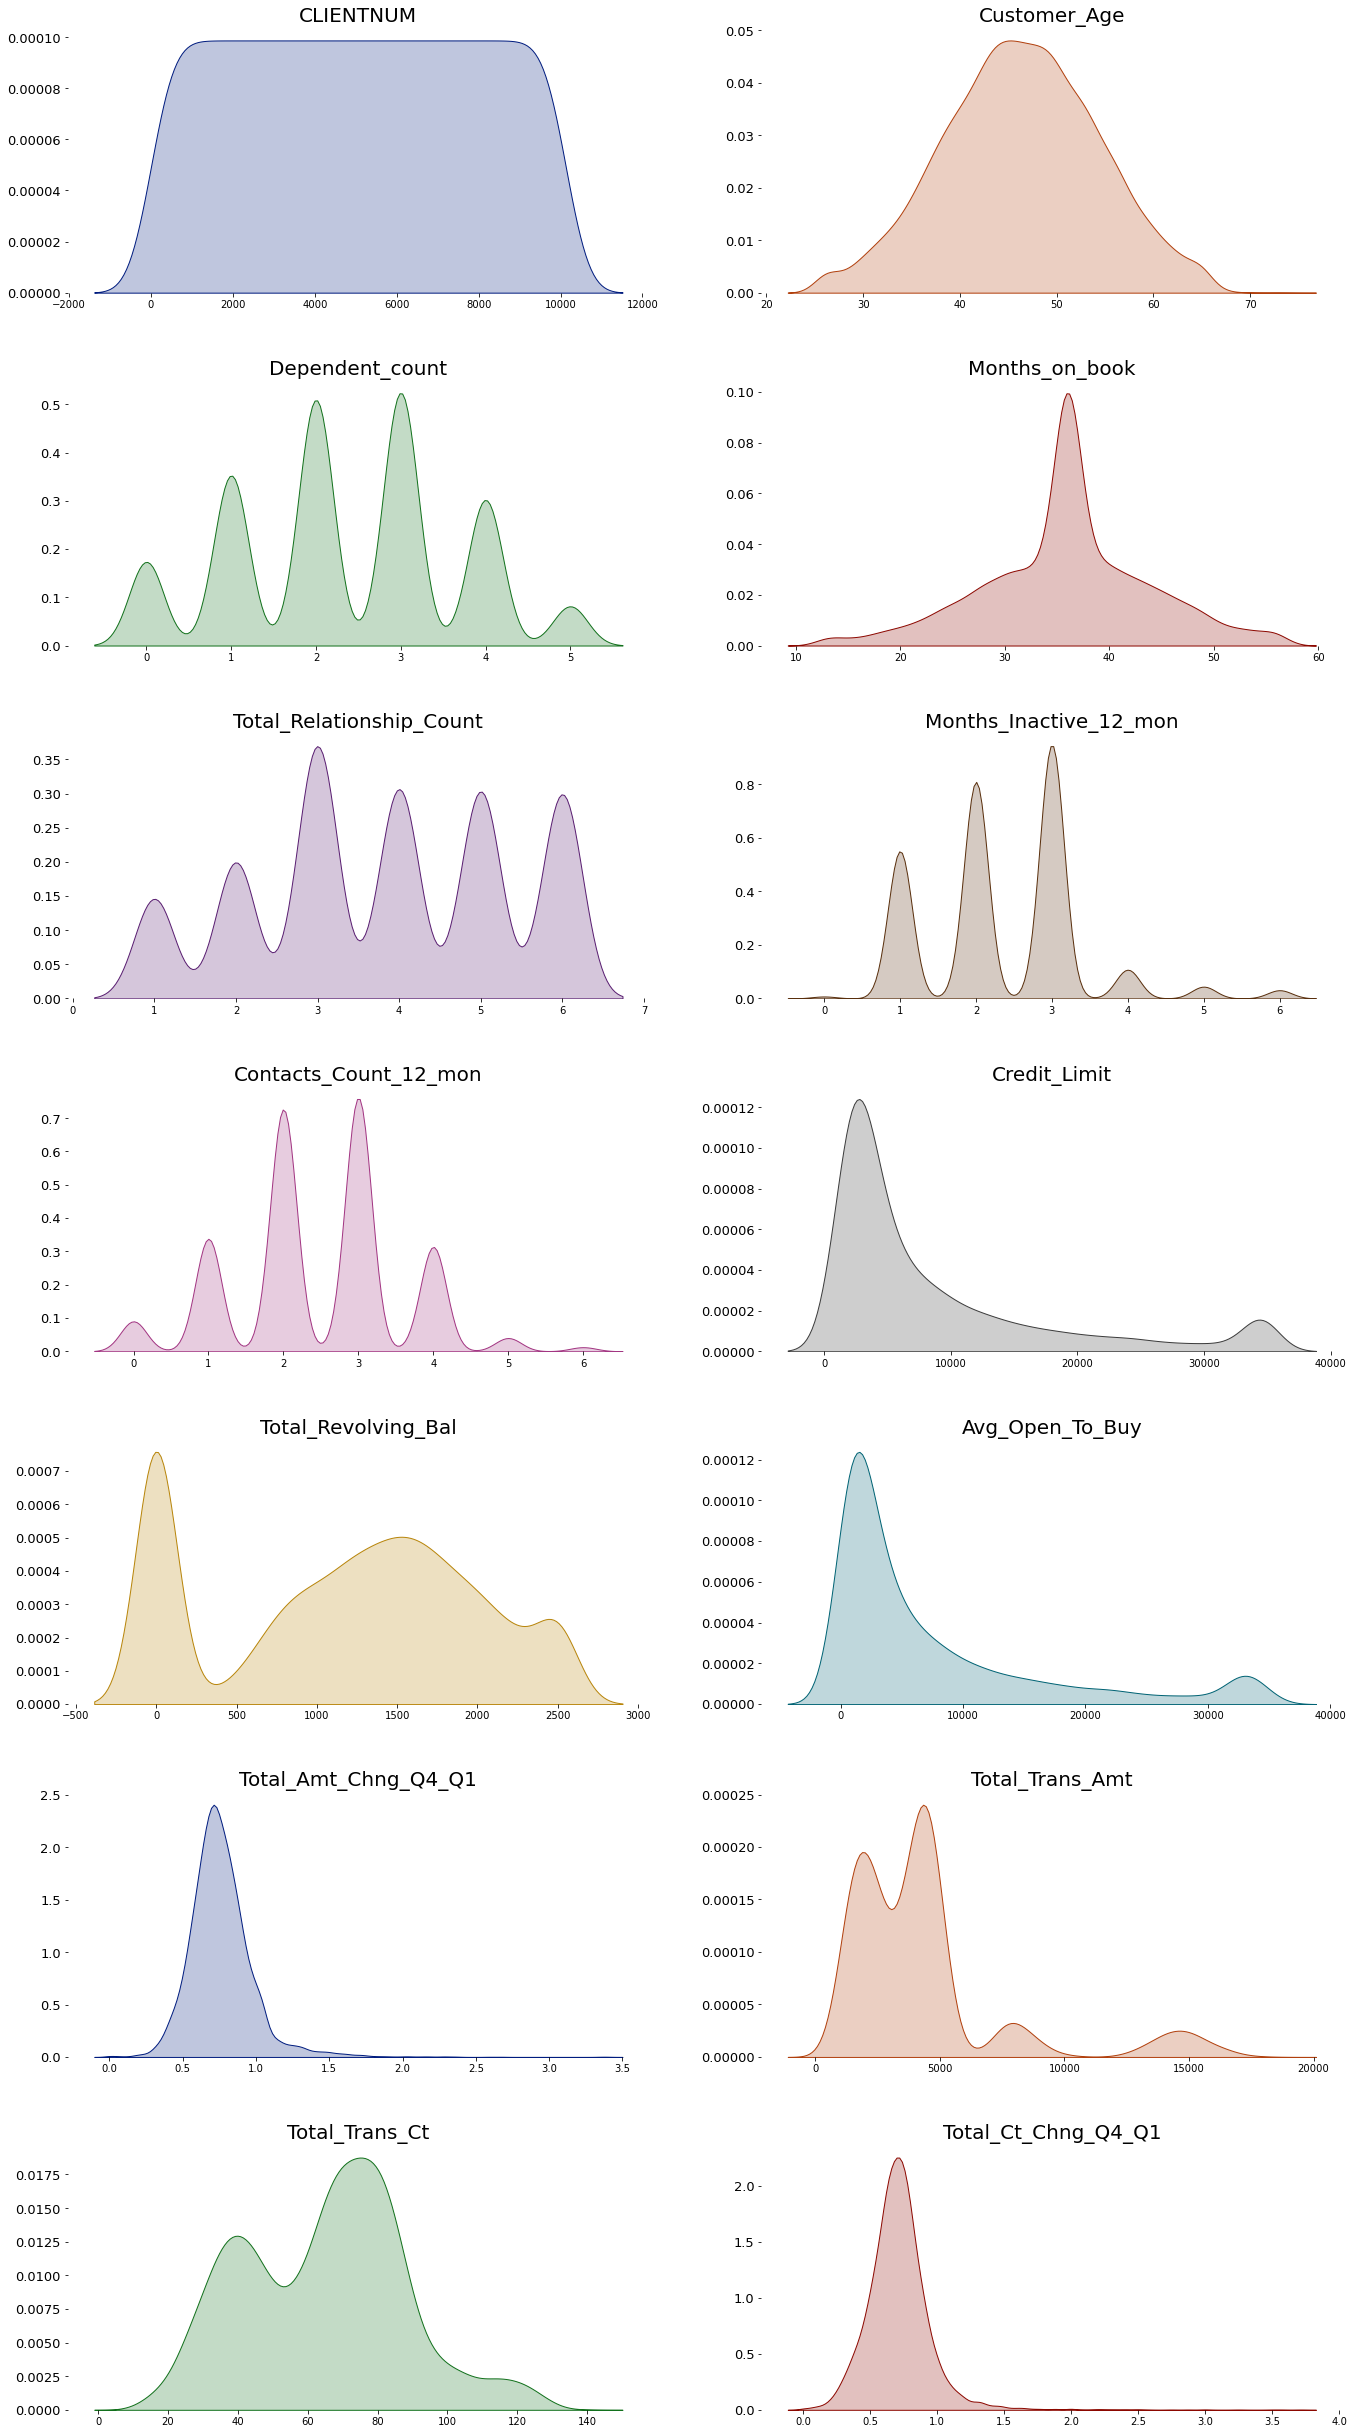

In [14]:
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

categ = df.select_dtypes(include=object).columns
numeric = df.select_dtypes(exclude=object).columns
fig, ax = plt.subplots(figsize =(20, 35))
fig.patch.set_facecolor('white')


colors = sns.color_palette("dark", n_colors=14).as_hex()

# Loop columns
for i in (enumerate(numeric)):
    plt.subplot(7, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = df, color=colors[i[0]], fill=True)
    plt.grid(b=None)
    plot_design()

In [15]:
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tools
import warnings
from collections import Counter 
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Atrition Flag','Gender'))

# Based on Attrition_Flag

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Attrition_Flag").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Client Type'] = data2.index

labels = data2['Client Type'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Client Type"),
                    1, 1)


# Based on Attrition_Flag

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Gender").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Gender'] = data2.index

labels = data2['Gender'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Gender"),
                    1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig['layout'].update(height=500, width=900, title='Number of Client based on:')
fig.show()

In [16]:
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Educational Level','Marital Status'))

# Based on Education_Level

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Education_Level").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Education Level'] = data2.index

labels = data2['Education Level'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Education Level"),
                    1, 1)


# Based on Marital_Status

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Marital_Status").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Marital Status'] = data2.index

labels = data2['Marital Status'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Marital Status"),
                    1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig['layout'].update(height=500, width=900, title='Number of Client based on:')
fig.show()

In [17]:
fig = make_subplots(rows=1, 
                    cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('Income Category','Card Category'))

# Based on Income_Category

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Income_Category").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Income Category'] = data2.index

labels = data2['Income Category'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Income Category"),
                    1, 1)


# Based on Card_Category

custom_aggregation = {}
custom_aggregation["CLIENTNUM"] = "count"
data2 = df.groupby("Card_Category").agg(custom_aggregation)
data2.columns = ["Number of Client"]
data2['Card Category'] = data2.index

labels = data2['Card Category'].tolist()
values = data2['Number of Client'].tolist()

fig.add_trace(go.Pie(
                    labels=labels, 
                    values=values, 
                    name="Card Category"),               
                    1, 2)

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')

fig['layout'].update(height=500, width=900, title='Number of Client based on:')
fig.show()

In [18]:
import plotly.express as px

fig = px.box(df, x="Attrition_Flag", y="Customer_Age", color="Attrition_Flag", boxmode="overlay")

fig['layout'].update(height=500, width=750, title='Customer Age Based on Attrition Flag')
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [19]:

fig = px.box(df, x="Attrition_Flag", y="Dependent_count", color="Attrition_Flag", boxmode="overlay")

fig['layout'].update(height=500, width=750, title='Dependent Count Based on Attrition Flag')
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [20]:
custom_aggregation = {}
custom_aggregation["Months_on_book"] = "mean"
custom_aggregation["Total_Relationship_Count"] = "mean"
custom_aggregation["Months_Inactive_12_mon"] = "mean"
custom_aggregation["Contacts_Count_12_mon"] = "mean"
custom_aggregation["Credit_Limit"] = "mean"
custom_aggregation["Total_Revolving_Bal"] = "mean"

data2 = df.groupby("Attrition_Flag").agg(custom_aggregation)
data2['Customer'] = data2.index

d1 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Months_on_book"],
    name='Months on Book')

d2 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Relationship_Count"],
    name='Total Relationship')

d3 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Months_Inactive_12_mon"],
    name='Months Inactive')

d4 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Contacts_Count_12_mon"],
    name='Contact Count')

d5 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Credit_Limit"],
    name='Credit Limit')

d6 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Revolving_Bal"],
    name='Revolving Balance')



data = [d1,d2,d3,d4,d5,d6]

fig = tools.make_subplots(rows=3, 
                          cols=2, 
                          #specs=[[{}, {}], [{'colspan': 1}, None]],
                          subplot_titles=('Months on Book',
                                         'Total Relationship',
                                         'Months Inactive',
                                         'Contact Count',
                                         'Credit Limit',
                                         'Revolving Balance'))

fig.append_trace(d1, 1, 1)
fig.append_trace(d2, 1, 2)
fig.append_trace(d3, 2, 1)
fig.append_trace(d4, 2, 2)
fig.append_trace(d5, 3, 1)
fig.append_trace(d6, 3, 2)

fig['layout'].update(height=1000, width=900, title='Attrited vs Existing Customer', boxmode='group')
py.iplot(fig, filename='combined-savings')

D:\farrell\LES DATA SCIENCE\Software\Anaconda\Anaconda\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [21]:
custom_aggregation = {}
custom_aggregation["Avg_Open_To_Buy"] = "mean"
custom_aggregation["Total_Amt_Chng_Q4_Q1"] = "mean"
custom_aggregation["Total_Trans_Amt"] = "mean"
custom_aggregation["Total_Trans_Ct"] = "mean"
custom_aggregation["Total_Ct_Chng_Q4_Q1"] = "mean"
custom_aggregation["Avg_Utilization_Ratio"] = "mean"

data2 = df.groupby("Attrition_Flag").agg(custom_aggregation)
data2['Customer'] = data2.index

d1 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Avg_Open_To_Buy"],
    name='Avg. Open to Buy')

d2 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Amt_Chng_Q4_Q1"],
    name='Amount Change')

d3 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Trans_Amt"],
    name='Transaction Amount')

d4 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Trans_Ct"],
    name='Transaction Count')

d5 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Total_Ct_Chng_Q4_Q1"],
    name='Count Change')

d6 = go.Bar(
    x = data2.Customer.value_counts().index.sort_values(),
    y = data2["Avg_Utilization_Ratio"],
    name='Avg. Utilization Ratio')


data = [d1,d2,d3,d4,d5,d6]

fig = tools.make_subplots(rows=3, 
                          cols=2, 
                          #specs=[[{}, {}], [{'colspan': 1}, None]],
                          subplot_titles=('Avg. Open to Buy',
                                         'Amount Change',
                                         'Transaction Amount',
                                         'Transaction Count',
                                         'Count Change',
                                         'Avg. Utilization Ratio'))

fig.append_trace(d1, 1, 1)
fig.append_trace(d2, 1, 2)
fig.append_trace(d3, 2, 1)
fig.append_trace(d4, 2, 2)
fig.append_trace(d5, 3, 1)
fig.append_trace(d6, 3, 2)

fig['layout'].update(height=1000, width=900, title='Attrited vs Existing Customer', boxmode='group')
py.iplot(fig, filename='combined-savings')

# Preprocessing

In [22]:
df = df[~df['Education_Level'].str.contains('Unknown')] 
df = df[~df['Marital_Status'].str.contains('Unknown')]
df = df[~df['Income_Category'].str.contains('Unknown')]

In [23]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [24]:
df['Attrition_Flag'][df['Attrition_Flag'] == 'Existing Customer'] = 0
df['Attrition_Flag'][df['Attrition_Flag'] == 'Attrited Customer'] = 1

In [25]:
df['Education_Level'][df['Education_Level'] == 'Uneducated'] = 0
df['Education_Level'][df['Education_Level'] == 'High School'] = 1
df['Education_Level'][df['Education_Level'] == 'Graduate'] = 2
df['Education_Level'][df['Education_Level'] == 'Post-Graduate'] = 3
df['Education_Level'][df['Education_Level'] == 'College'] = 4
df['Education_Level'][df['Education_Level'] == 'Doctorate'] = 5

In [26]:
from sklearn.preprocessing import LabelEncoder

le.fit(df['Gender'])

df['Gender'] = le.transform(df['Gender'])

l = [i for i in range(2)]
dict(zip(list(le.classes_), l))

{'F': 0, 'M': 1}

In [27]:
le.fit(df['Marital_Status'])

df['Marital_Status'] = le.transform(df['Marital_Status'])

l = [i for i in range(4)]
dict(zip(list(le.classes_), l))

{'Divorced': 0, 'Married': 1, 'Single': 2}

In [28]:
le.fit(df['Income_Category'])

df['Income_Category'] = le.transform(df['Income_Category'])

l = [i for i in range(6)]
dict(zip(list(le.classes_), l))

{'$120K +': 0,
 '$40K - $60K': 1,
 '$60K - $80K': 2,
 '$80K - $120K': 3,
 'Less than $40K': 4}

In [29]:
le.fit(df['Card_Category'])

df['Card_Category'] = le.transform(df['Card_Category'])

l = [i for i in range(4)]
dict(zip(list(le.classes_), l))

{'Blue': 0, 'Gold': 1, 'Platinum': 2, 'Silver': 3}

In [30]:
le.fit(df['Attrition_Flag'])

df['Attrition_Flag'] = le.transform(df['Attrition_Flag'])

l = [i for i in range(2)]
dict(zip(list(le.classes_), l))

{0: 0, 1: 1}

In [31]:
df.groupby('Attrition_Flag').size()

Attrition_Flag
0    5968
1    1113
dtype: int64

In [32]:
df = df.sample(frac=1)

exis = df.loc[df['Attrition_Flag'] == 1]
attr = df.loc[df['Attrition_Flag'] == 0][:1627]


normal_distributed_df = pd.concat([exis, attr])

# Shuffle dataframe rows
df = normal_distributed_df.sample(frac=1, random_state=42)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_mon_1,Naive_Bayes_mon_2
8186,2320,1,44,0,1,1,2,4,0,36,2,3,3,1895.0,0,1895.0,0.736,2472,40,0.429,0.000,0.996390,0.003609
4988,8581,1,50,1,2,1,1,0,3,37,5,2,1,34516.0,399,34117.0,0.726,2118,41,0.519,0.012,0.983690,0.016310
3505,4208,0,52,1,2,1,2,1,0,36,3,1,3,1470.0,0,1470.0,0.640,4095,63,0.750,0.000,0.000090,0.999910
7142,472,0,47,0,4,1,2,1,0,36,3,1,1,1596.0,0,1596.0,0.788,5678,81,0.800,0.000,0.000034,0.999970
8632,3466,0,49,1,2,5,0,3,0,36,3,3,1,25178.0,1803,23375.0,0.767,7836,87,0.582,0.072,0.000157,0.999840


In [33]:
df.groupby('Attrition_Flag').size()

Attrition_Flag
0    1627
1    1113
dtype: int64

In [34]:
for feature in df.columns:
    if df[feature].dtype =='object':
        df[feature] = pd.Categorical(df[feature]).codes

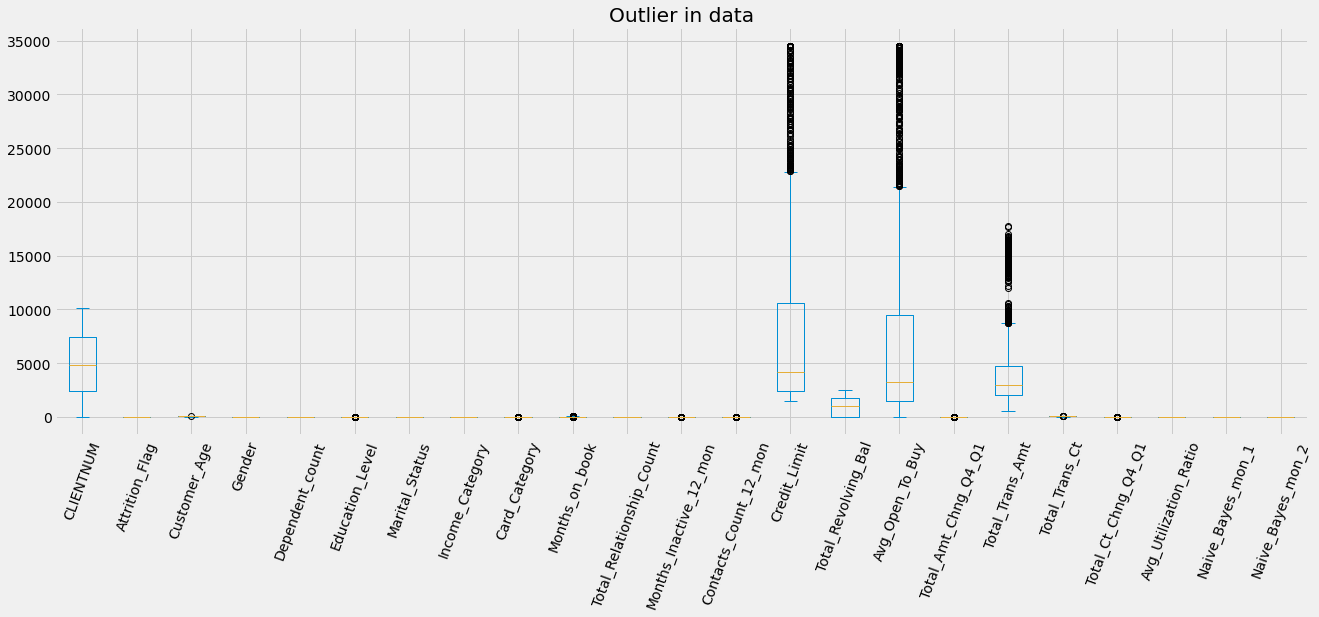

In [35]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

In [36]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [37]:
outlier_list = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

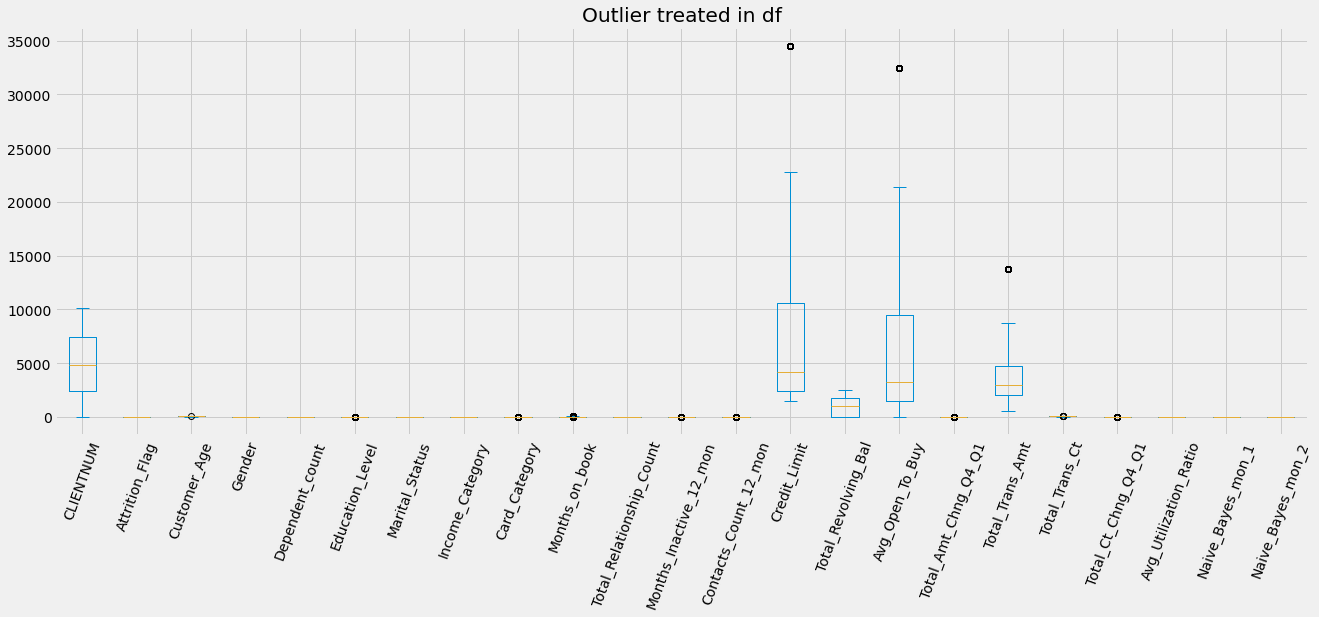

In [38]:
plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

[Text(0, 0.5, 'CLIENTNUM'),
 Text(0, 1.5, 'Attrition_Flag'),
 Text(0, 2.5, 'Customer_Age'),
 Text(0, 3.5, 'Gender'),
 Text(0, 4.5, 'Dependent_count'),
 Text(0, 5.5, 'Education_Level'),
 Text(0, 6.5, 'Marital_Status'),
 Text(0, 7.5, 'Income_Category'),
 Text(0, 8.5, 'Card_Category'),
 Text(0, 9.5, 'Months_on_book'),
 Text(0, 10.5, 'Total_Relationship_Count'),
 Text(0, 11.5, 'Months_Inactive_12_mon'),
 Text(0, 12.5, 'Contacts_Count_12_mon'),
 Text(0, 13.5, 'Credit_Limit'),
 Text(0, 14.5, 'Total_Revolving_Bal'),
 Text(0, 15.5, 'Avg_Open_To_Buy'),
 Text(0, 16.5, 'Total_Amt_Chng_Q4_Q1'),
 Text(0, 17.5, 'Total_Trans_Amt'),
 Text(0, 18.5, 'Total_Trans_Ct'),
 Text(0, 19.5, 'Total_Ct_Chng_Q4_Q1'),
 Text(0, 20.5, 'Avg_Utilization_Ratio'),
 Text(0, 21.5, 'Naive_Bayes_mon_1'),
 Text(0, 22.5, 'Naive_Bayes_mon_2')]

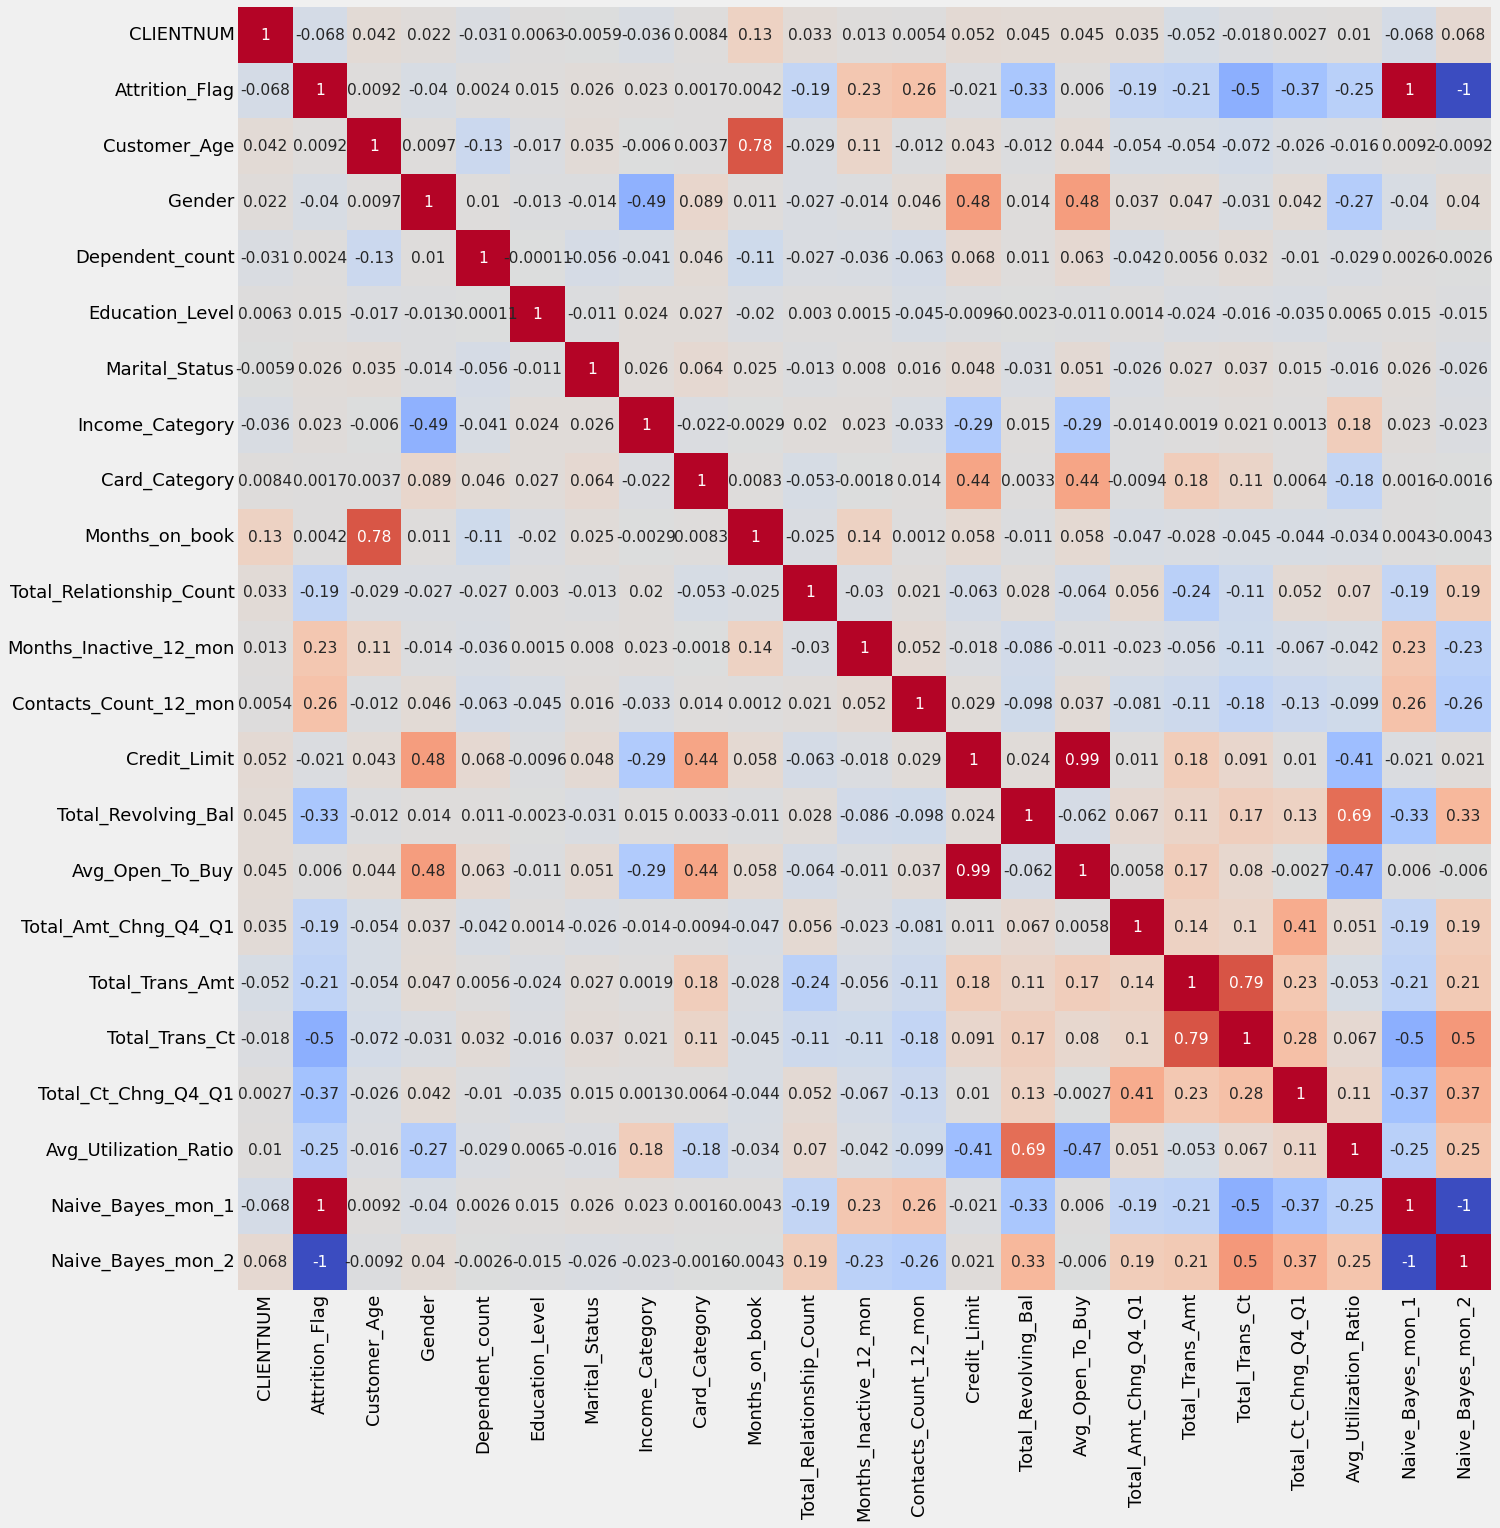

In [39]:
fig, ax = plt.subplots( figsize = (20,22) )
res = sns.heatmap( df.corr(), cmap='coolwarm', annot=True, ax = ax, annot_kws={"size": 15.5}, cbar=False)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

In [40]:
df.corr()['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag              1.000000
Naive_Bayes_mon_1           0.999985
Contacts_Count_12_mon       0.260923
Months_Inactive_12_mon      0.226935
Marital_Status              0.025896
Income_Category             0.022629
Education_Level             0.014976
Customer_Age                0.009158
Avg_Open_To_Buy             0.006010
Months_on_book              0.004158
Dependent_count             0.002376
Card_Category               0.001744
Credit_Limit               -0.020847
Gender                     -0.040456
CLIENTNUM                  -0.068485
Total_Relationship_Count   -0.185650
Total_Amt_Chng_Q4_Q1       -0.186604
Total_Trans_Amt            -0.206117
Avg_Utilization_Ratio      -0.247315
Total_Revolving_Bal        -0.334004
Total_Ct_Chng_Q4_Q1        -0.369345
Total_Trans_Ct             -0.501099
Naive_Bayes_mon_2          -0.999985
Name: Attrition_Flag, dtype: float64

#### Melakukan drop pada variabel yang tidak terlalu penting

In [41]:
df.drop(columns=['Naive_Bayes_mon_1', 'Naive_Bayes_mon_2','CLIENTNUM'],inplace=True)

[Text(0, 0.5, 'Attrition_Flag'),
 Text(0, 1.5, 'Customer_Age'),
 Text(0, 2.5, 'Gender'),
 Text(0, 3.5, 'Dependent_count'),
 Text(0, 4.5, 'Education_Level'),
 Text(0, 5.5, 'Marital_Status'),
 Text(0, 6.5, 'Income_Category'),
 Text(0, 7.5, 'Card_Category'),
 Text(0, 8.5, 'Months_on_book'),
 Text(0, 9.5, 'Total_Relationship_Count'),
 Text(0, 10.5, 'Months_Inactive_12_mon'),
 Text(0, 11.5, 'Contacts_Count_12_mon'),
 Text(0, 12.5, 'Credit_Limit'),
 Text(0, 13.5, 'Total_Revolving_Bal'),
 Text(0, 14.5, 'Avg_Open_To_Buy'),
 Text(0, 15.5, 'Total_Amt_Chng_Q4_Q1'),
 Text(0, 16.5, 'Total_Trans_Amt'),
 Text(0, 17.5, 'Total_Trans_Ct'),
 Text(0, 18.5, 'Total_Ct_Chng_Q4_Q1'),
 Text(0, 19.5, 'Avg_Utilization_Ratio')]

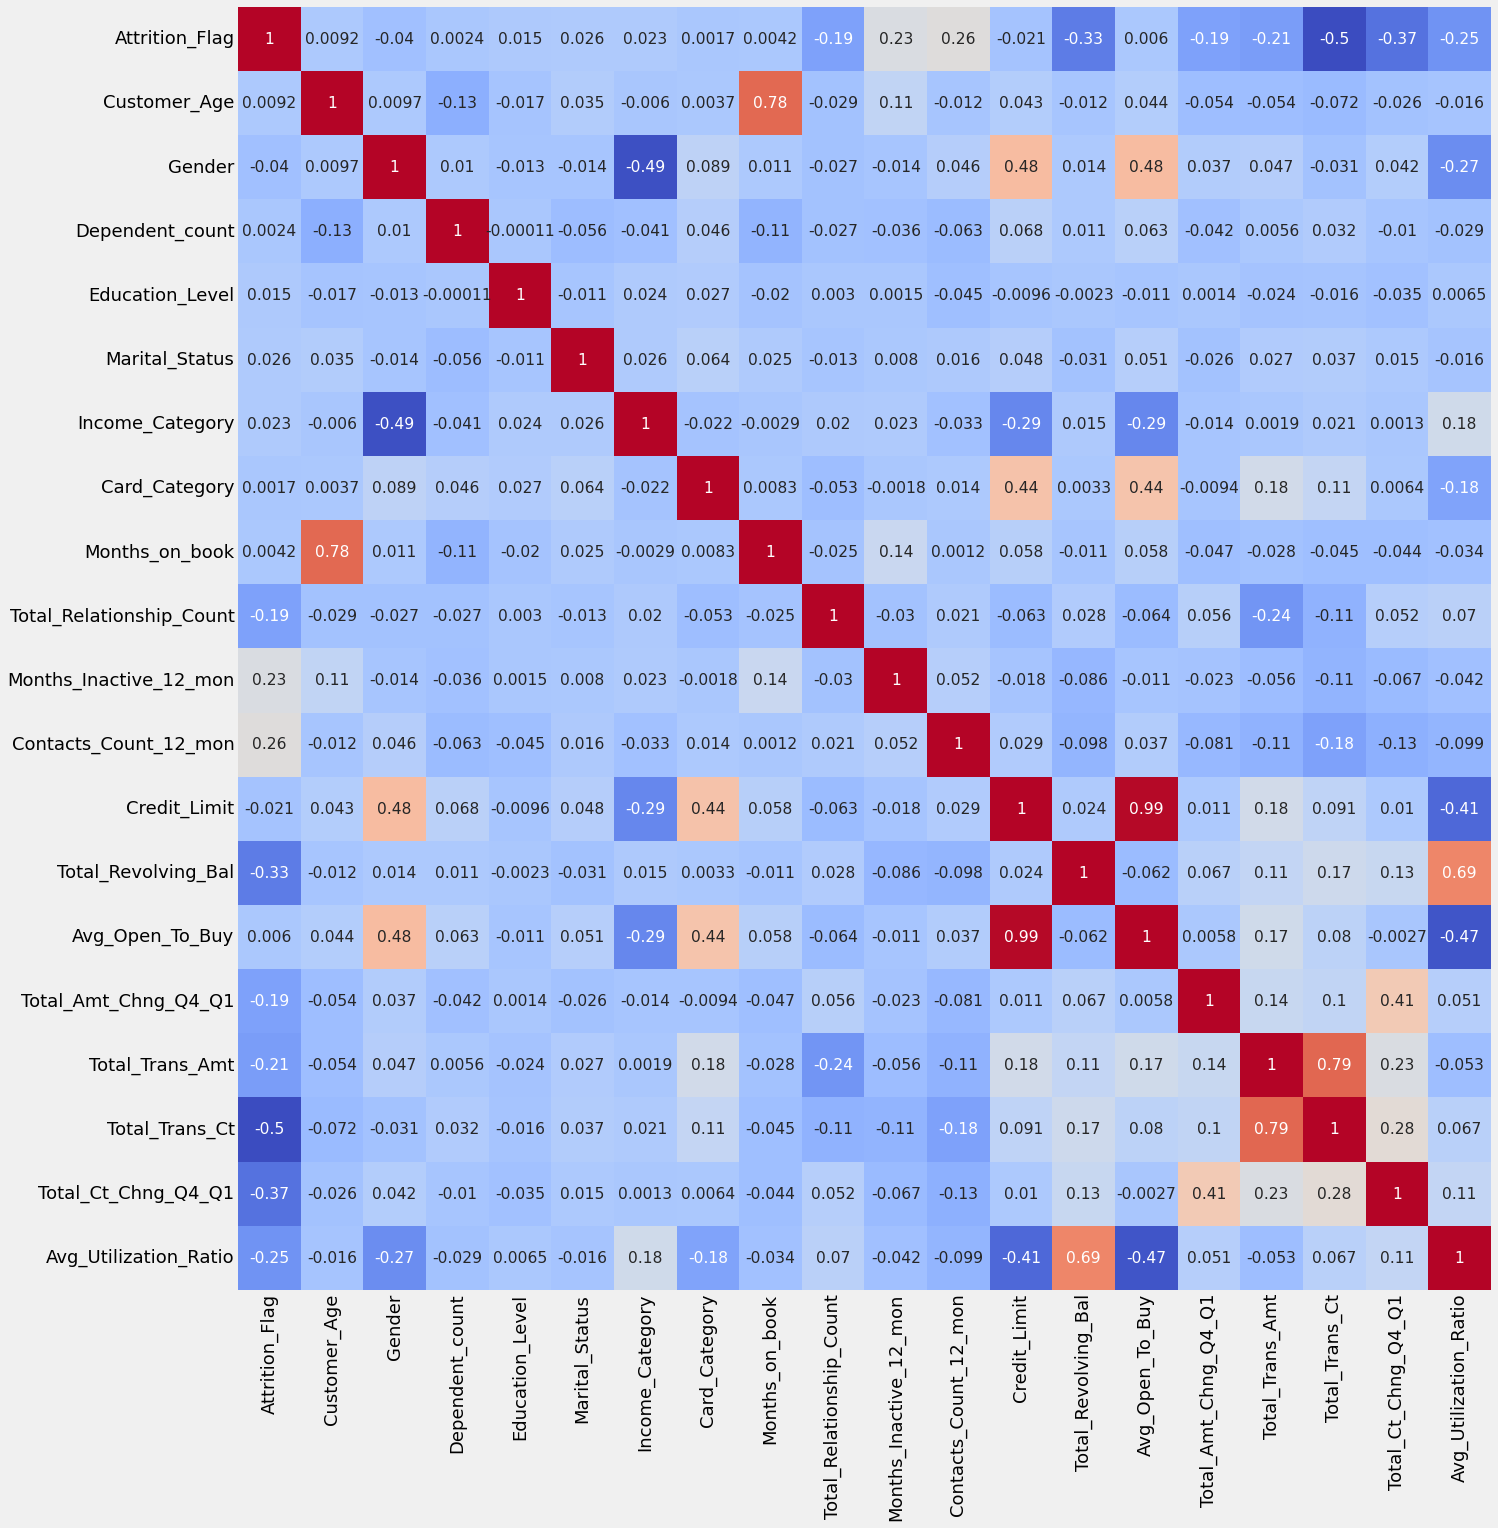

In [42]:
fig, ax = plt.subplots( figsize = (20,22) )
res = sns.heatmap( df.corr(), cmap='coolwarm', annot=True, ax = ax, annot_kws={"size": 15.5}, cbar=False)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)

In [43]:
df.corr()['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag              1.000000
Contacts_Count_12_mon       0.260923
Months_Inactive_12_mon      0.226935
Marital_Status              0.025896
Income_Category             0.022629
Education_Level             0.014976
Customer_Age                0.009158
Avg_Open_To_Buy             0.006010
Months_on_book              0.004158
Dependent_count             0.002376
Card_Category               0.001744
Credit_Limit               -0.020847
Gender                     -0.040456
Total_Relationship_Count   -0.185650
Total_Amt_Chng_Q4_Q1       -0.186604
Total_Trans_Amt            -0.206117
Avg_Utilization_Ratio      -0.247315
Total_Revolving_Bal        -0.334004
Total_Ct_Chng_Q4_Q1        -0.369345
Total_Trans_Ct             -0.501099
Name: Attrition_Flag, dtype: float64

# Modelling

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2740 entries, 8186 to 3418
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            2740 non-null   int32  
 1   Customer_Age              2740 non-null   int64  
 2   Gender                    2740 non-null   int32  
 3   Dependent_count           2740 non-null   int64  
 4   Education_Level           2740 non-null   int8   
 5   Marital_Status            2740 non-null   int32  
 6   Income_Category           2740 non-null   int32  
 7   Card_Category             2740 non-null   int32  
 8   Months_on_book            2740 non-null   int64  
 9   Total_Relationship_Count  2740 non-null   int64  
 10  Months_Inactive_12_mon    2740 non-null   int64  
 11  Contacts_Count_12_mon     2740 non-null   int64  
 12  Credit_Limit              2740 non-null   float64
 13  Total_Revolving_Bal       2740 non-null   int64  
 14  Avg_O

In [45]:
X =df[['Customer_Age', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1']]
y = df['Attrition_Flag']

In [46]:
num_columns = X.select_dtypes(include='number').columns.tolist()
num_columns

['Customer_Age',
 'Income_Category',
 'Card_Category',
 'Total_Relationship_Count',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

In [47]:
num_features = [] 

for i in num_columns:
    location = X.columns.get_loc(i)
    num_features.append(location)
print(num_features)  

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [48]:
cat_columns = X.select_dtypes(include='object').columns.tolist()
cat_columns

[]

In [49]:
cat_features = []

for i in cat_columns:
    location = X.columns.get_loc(i)
    cat_features.append(location)
print(cat_features)  

[]


In [50]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from imblearn.pipeline import make_pipeline as imbl_pipe
preprocess = make_column_transformer(
    (MinMaxScaler(), num_features),
    (OneHotEncoder(sparse=False), cat_features)
)
preprocess

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                ('onehotencoder', OneHotEncoder(sparse=False),
                                 [])])

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

In [52]:
from imblearn.over_sampling import SMOTE 
OS_SMOTE = SMOTE()

X_train, y_train = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  Attrition_Flag
0       0            1129
1       1            1129


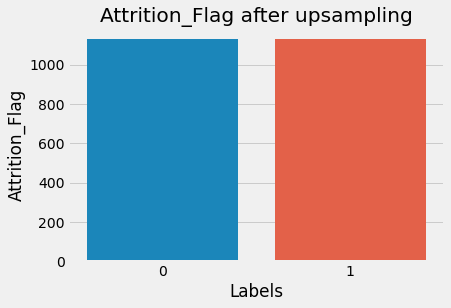

In [53]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','Attrition_Flag']
print(oversample_plot)
sns.barplot(x='Labels',y='Attrition_Flag',data=oversample_plot);
plt.title('Attrition_Flag after upsampling');

## Reduction 

findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Ubuntu'] not found. Falling back to DejaVu Sans.


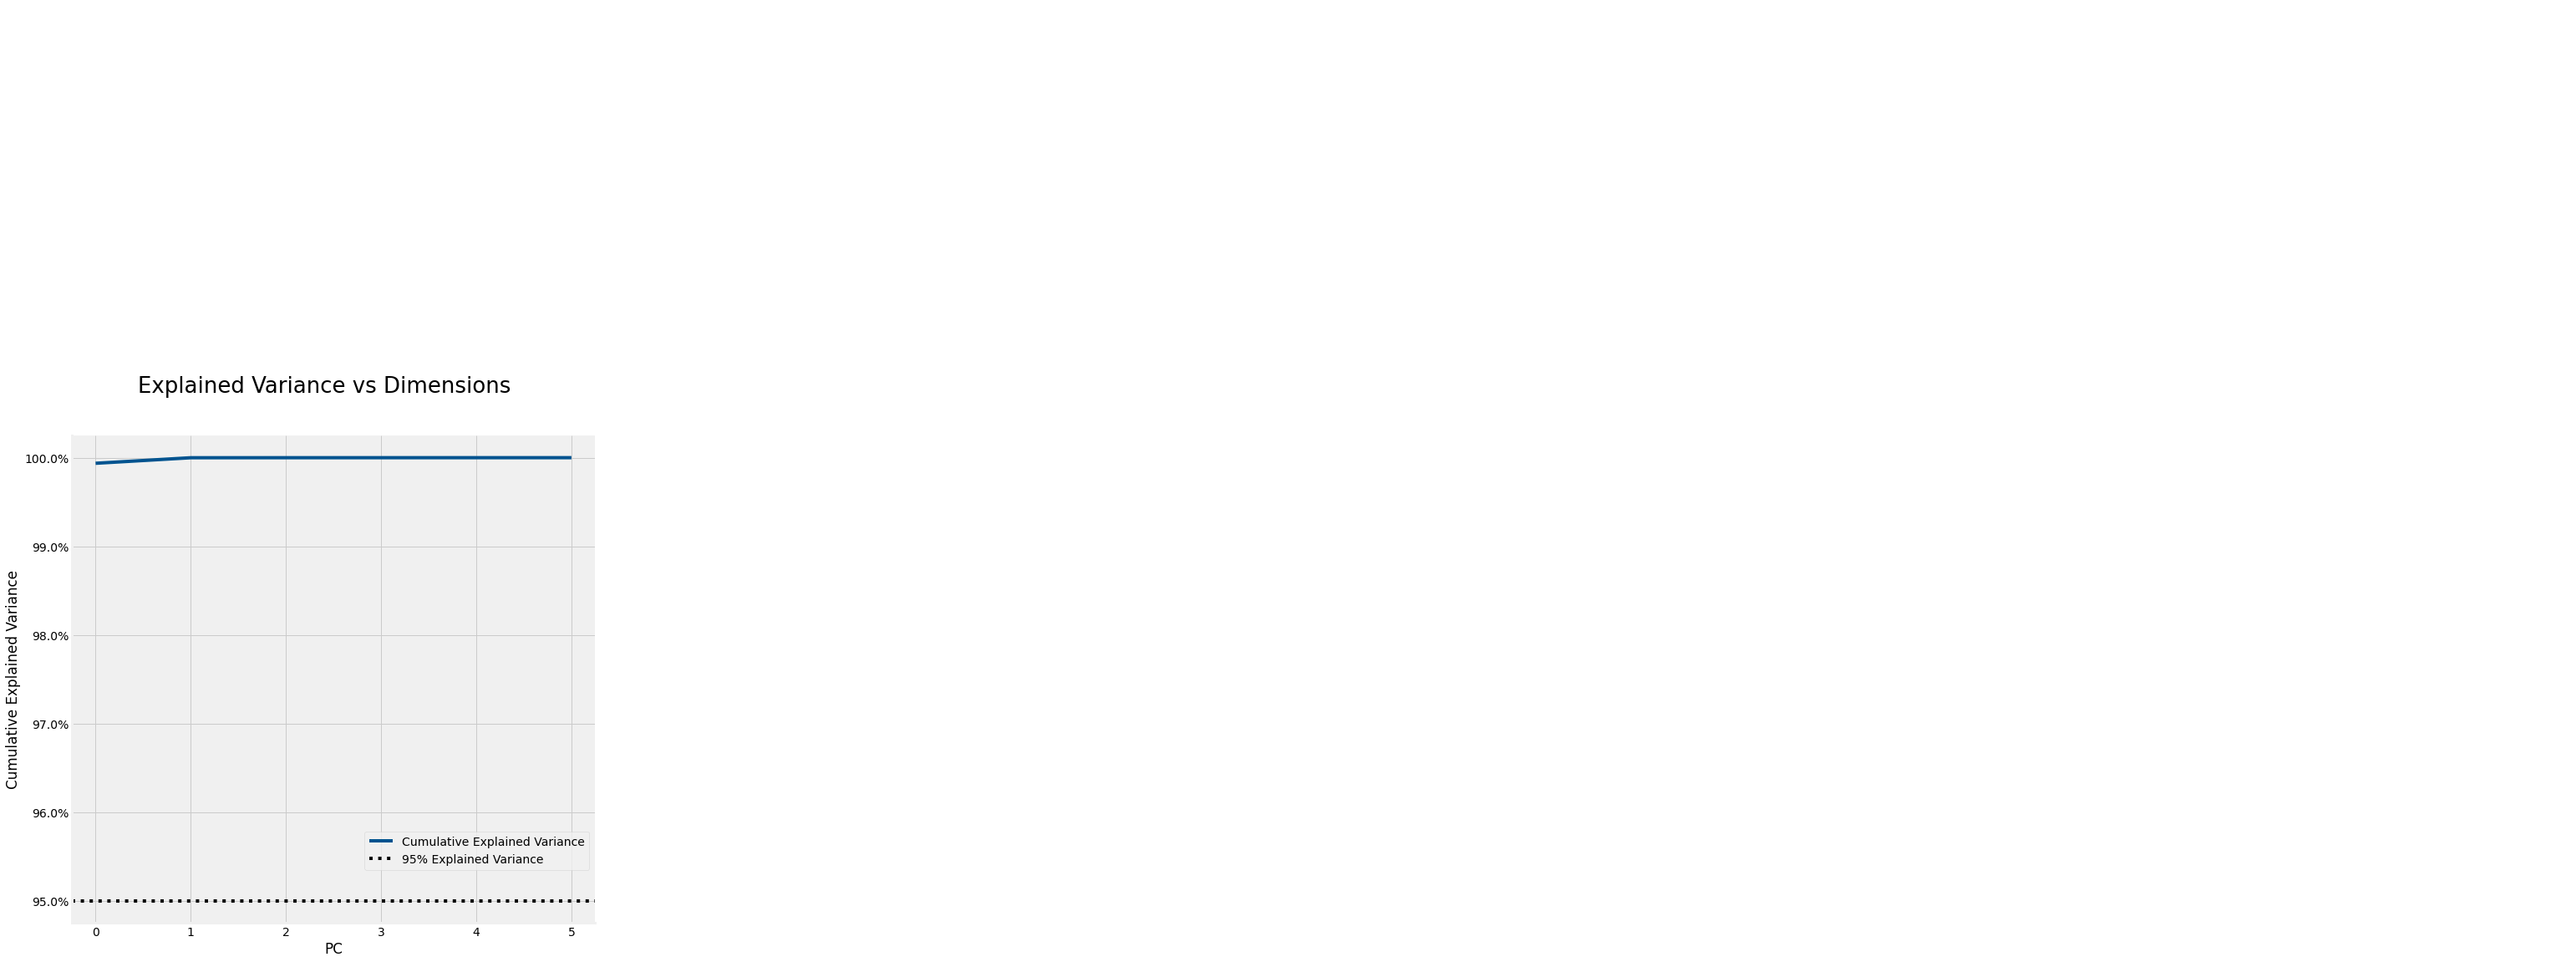

In [52]:
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

In [53]:
pca = PCA(.95) 
pca.fit(X_train)

X_pca = pca.transform(X_train)
X_pca = pd.DataFrame(X_pca)

print(f'''Shape of X before PCA: {X_train.shape}
Shape of X after PCA: {X_pca.shape}''')

Shape of X before PCA: (2258, 6)
Shape of X after PCA: (2258, 1)


#### Random Forest

In [54]:
# Import classifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE 


# Define model with pipeline
model_rf = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  RandomForestClassifier())

model_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('randomforestclassifier', RandomForestClassifier())])

In [55]:
from sklearn.model_selection import RandomizedSearchCV
rf_param_grid = {
    'randomforestclassifier__n_estimators' : [50, 100, 150],
    'randomforestclassifier__max_features' : ['sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 5 ,10, 15],
    'randomforestclassifier__criterion' : ['gini', 'entropy'],
    'randomforestclassifier__min_samples_split' : [2, 3, 4]
}
rf_grid = RandomizedSearchCV(model_rf, rf_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [56]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.938 total time=   0.7s
[CV 2/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.954 total time=   0.5s
[CV 3/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=150;, score=0.894 total time=   0.5s
[CV 4/5] END randomforestclassifier__criterion=entropy, randomforestclassifier__max_features=0.33, randomforestclassifier__min_samples_leaf=5, randomfore

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('minmaxscaler',
                                                                               MinMaxScaler(),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                      

In [57]:
print(f"Training Data Score: {rf_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {rf_grid.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9318734793187348


In [58]:
predictions = rf_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 1 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [59]:
# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, predictions)
print(cm)

[[460  38]
 [ 18 306]]


In [60]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.92 0.08]
 [0.06 0.94]]


In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       498
           1       0.89      0.94      0.92       324

    accuracy                           0.93       822
   macro avg       0.93      0.93      0.93       822
weighted avg       0.93      0.93      0.93       822



In [62]:
from sklearn import metrics

In [63]:
auc_roc = metrics.roc_auc_score(y_test, predictions)
auc_roc

0.9340696117804551

In [64]:
from sklearn.metrics import mean_squared_error
mse = metrics.mean_squared_error(y_test, predictions)
mse

0.0681265206812652

##### KNN

In [65]:
# Import classifier
from sklearn.neighbors import KNeighborsClassifier

# Define model with pipeline
model_knn = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  KNeighborsClassifier())

model_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [66]:
from sklearn.model_selection import GridSearchCV
kn_param_grid = {
    'kneighborsclassifier__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'kneighborsclassifier__weights' : ['uniform', 'distance'],
    'kneighborsclassifier__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}
kn_grid = RandomizedSearchCV(model_knn, kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [67]:
kn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END kneighborsclassifier__algorithm=ball_tree, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__weights=uniform;, score=0.836 total time=   0.0s
[CV 2/5] END kneighborsclassifier__algorithm=ball_tree, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__weights=uniform;, score=0.803 total time=   0.0s
[CV 3/5] END kneighborsclassifier__algorithm=ball_tree, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__weights=uniform;, score=0.783 total time=   0.0s
[CV 4/5] END kneighborsclassifier__algorithm=ball_tree, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__weights=uniform;, score=0.836 total time=   0.0s
[CV 5/5] END kneighborsclassifier__algorithm=ball_tree, kneighborsclassifier__n_neighbors=18, kneighborsclassifier__weights=uniform;, score=0.860 total time=   0.0s
[CV 1/5] END kneighborsclassifier__algorithm=kd_tree, kneighborsclassifier__n_neighbors=23, kneighborsclassifier__

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('minmaxscaler',
                                                                               MinMaxScaler(),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                      

In [68]:
print(f"Training Data Score: {kn_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {kn_grid.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7773722627737226


In [69]:
predictions = kn_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 1 0 1 0 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [70]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[383 115]
 [ 68 256]]


In [71]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.77 0.23]
 [0.21 0.79]]


In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       498
           1       0.69      0.79      0.74       324

    accuracy                           0.78       822
   macro avg       0.77      0.78      0.77       822
weighted avg       0.79      0.78      0.78       822



In [73]:
auc_roc = metrics.roc_auc_score(y_test, predictions)
auc_roc

0.7795998810055035

In [74]:
from sklearn.metrics import mean_squared_error
mse = metrics.mean_squared_error(y_test, predictions)
mse

0.22262773722627738

##### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression 

# Define model with pipeline
model_LR = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  LogisticRegression(random_state=10))

model_LR

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('logisticregression', LogisticRegression(random_state=10))])

In [76]:
lr_param_grid = {
    'logisticregression__C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'logisticregression__solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

lr_grid = RandomizedSearchCV(model_LR, lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [77]:
lr_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END logisticregression__C=5, logisticregression__solver=lbfgs;, score=0.819 total time=   0.3s
[CV 2/5] END logisticregression__C=5, logisticregression__solver=lbfgs;, score=0.836 total time=   0.0s
[CV 3/5] END logisticregression__C=5, logisticregression__solver=lbfgs;, score=0.796 total time=   0.0s
[CV 4/5] END logisticregression__C=5, logisticregression__solver=lbfgs;, score=0.849 total time=   0.0s
[CV 5/5] END logisticregression__C=5, logisticregression__solver=lbfgs;, score=0.845 total time=   0.0s
[CV 1/5] END logisticregression__C=0.05, logisticregression__solver=saga;, score=0.739 total time=   0.0s
[CV 2/5] END logisticregression__C=0.05, logisticregression__solver=saga;, score=0.799 total time=   0.0s
[CV 3/5] END logisticregression__C=0.05, logisticregression__solver=saga;, score=0.719 total time=   0.0s
[CV 4/5] END logisticregression__C=0.05, logisticregression__solver=saga;, score=0.783 total time=   

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('minmaxscaler',
                                                                               MinMaxScaler(),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                      

In [78]:
print(lr_grid.best_params_)

{'logisticregression__solver': 'lbfgs', 'logisticregression__C': 5}


In [79]:
print(lr_grid.best_score_)

0.8290681474795439


In [80]:
print(f"Training Data Score: {lr_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_grid.score(X_test, y_test)}")

Training Data Score: 0.8321523472099203
Testing Data Score: 0.8248175182481752


In [81]:
predictions = lr_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 1 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [82]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[399  99]
 [ 45 279]]


In [83]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.8  0.2 ]
 [0.14 0.86]]


In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       498
           1       0.74      0.86      0.79       324

    accuracy                           0.82       822
   macro avg       0.82      0.83      0.82       822
weighted avg       0.84      0.82      0.83       822



In [85]:
pred = lr_grid.predict(X_test[:1])

In [86]:
print(f"Predicted classes: {pred}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [0]
Actual Labels: [0]


In [87]:
auc_roc = metrics.roc_auc_score(y_test, predictions)
auc_roc

0.8311579651941097

In [88]:
from sklearn.metrics import mean_squared_error
mse = metrics.mean_squared_error(y_test, predictions)
mse

0.17518248175182483

#### SVM

In [89]:
from sklearn.svm import SVC 
model_SVM = imbl_pipe(preprocess,
                  SVC(random_state=10))

model_SVM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('svc', SVC(random_state=10))])

In [90]:

param_grid = {'svc__kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'svc__C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'svc__gamma': [5, 1, 0.1, 0.01]}
svm_grid = RandomizedSearchCV(model_SVM, param_grid, verbose=3, cv= 5, n_jobs=4)

In [91]:
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('minmaxscaler',
                                                                               MinMaxScaler(),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                      

In [92]:
print(svm_grid.best_params_)

{'svc__kernel': 'rbf', 'svc__gamma': 5, 'svc__C': 0.5}


In [93]:
print(svm_grid.best_score_)

0.8578625669603437


In [94]:
print(f"Training Data Score: {svm_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {svm_grid.score(X_test, y_test)}")

Training Data Score: 0.899911426040744
Testing Data Score: 0.8284671532846716


In [95]:
predictions = svm_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 1 0 0 0 1 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [96]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[415  83]
 [ 58 266]]


In [97]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.83 0.17]
 [0.18 0.82]]


In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       498
           1       0.76      0.82      0.79       324

    accuracy                           0.83       822
   macro avg       0.82      0.83      0.82       822
weighted avg       0.83      0.83      0.83       822



In [99]:
pred = svm_grid.predict(X_test[:1])

In [100]:
print(f"Predicted classes: {pred}")
print(f"Actual Labels: {list(y_test[:1])}")

Predicted classes: [0]
Actual Labels: [0]


In [101]:
auc_roc = metrics.roc_auc_score(y_test, predictions)
auc_roc

0.8271604938271606

In [102]:
from sklearn.metrics import mean_squared_error
mse = metrics.mean_squared_error(y_test, predictions)
mse

0.17153284671532848

#### XGBOOST

In [103]:
# Import XGBoost
import xgboost as xgb

# Define model with pipeline
model_xgb = imbl_pipe(preprocess,
                  SMOTE(sampling_strategy='auto', random_state=10),
                  xgb.XGBClassifier(random_state=10))

model_xgb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('smote', SMOTE(random_state=10)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, enable_categori...
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                               min_child_weig

In [104]:
from sklearn.model_selection import GridSearchCV

param_grid = {'xgbclassifier__gamma': [0.5, 0.8, 1],
              'xgbclassifier__max_depth': [3, 4, 5, 6],
              'xgbclassifier__n_estimators': [50, 100, 200]
        }
xgb_grid = RandomizedSearchCV(model_xgb, param_grid, verbose=3, cv= 5, n_jobs=4, scoring='f1_macro')

In [105]:

xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:08:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('minmaxscaler',
                                                                               MinMaxScaler(),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                                                3,
                                                                                4,
                                                                                5,
                                                                                6,
                                                                                7,
                                                      

In [106]:
print(f"Training Data Score: {xgb_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {xgb_grid.score(X_test, y_test)}")

Training Data Score: 0.9986713882658911
Testing Data Score: 0.9295909939123252


In [107]:
predictions = xgb_grid.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 1 0 1 1 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 1, 0, 1, 1, 0]


In [108]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[457  41]
 [ 15 309]]


In [109]:
cm = np.around(cm / cm.sum(axis=1)[:, np.newaxis], 2)
print(cm)

[[0.92 0.08]
 [0.05 0.95]]


In [110]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       498
           1       0.88      0.95      0.92       324

    accuracy                           0.93       822
   macro avg       0.93      0.94      0.93       822
weighted avg       0.93      0.93      0.93       822



In [111]:
auc_roc = metrics.roc_auc_score(y_test, predictions)
auc_roc

0.9356871932173136

In [112]:
from sklearn.metrics import mean_squared_error
mse = metrics.mean_squared_error(y_test, predictions)
mse

0.0681265206812652